2019-06-03 03:06:00 山西牛家岭项目4月份的在线振动检测报告中结论为齿轮箱中间轴小齿轮齿面缺陷，低中级咬合齿轮齿面缺陷。现场经过巡检用肉眼检查未发现异常情况 ，希望公司尽快协调重齿齿轮箱厂家携带内窥镜对齿轮箱进行检查确认。谢谢。

In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\feature\niu_jia_ling"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\niu_jia_ling"
wind_turbine = "14"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature, speed=speed)

feature.shape: (3621, 75)
speed.shape: (3621, 1)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

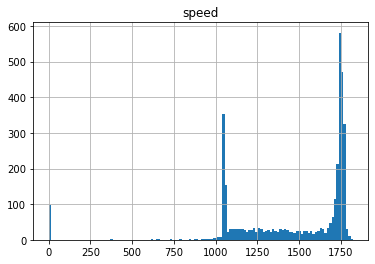

In [5]:
speed.hist(bins=128)

feature.shape: (3498, 75)
speed.shape: (3498, 1)


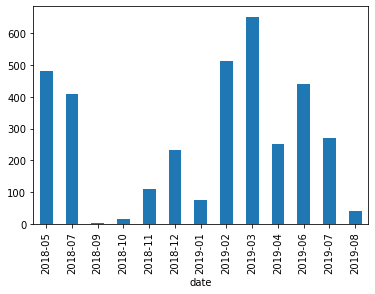

In [6]:
feature = feature[speed.speed >= 1000]
speed = speed[speed.speed >= 1000]

toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [7]:
# 划分train set, test set
train_start = "2018-05"
train_end = "2019-03"

test_start = "2019-04"
test_end = "2019"

feature_train = feature[train_start: train_end]
speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, speed_train=speed_train, feature_test=feature_test, speed_test=speed_test)

feature_train.shape: (2494, 75)
speed_train.shape: (2494, 1)
feature_test.shape: (1004, 75)
speed_test.shape: (1004, 1)


In [8]:
feature_test = feature
speed_test = speed

In [9]:
detector = model_entry.OutlierDetector()

In [ ]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











In [ ]:
detector.decision_scores.plot()

In [ ]:
anomaly_scores = detector.decision_function(feature_test)

In [ ]:
anomaly_scores.plot()